# Pickl.AI's Datathon 4

![image-3](image-3.png)


## **Problem Statement : Customer Segmentation-**

The growing complexities of customer demand have made it mandatory for companies to focus on customer satisfaction. Segmenting customers based on their preferences, age groups, and geographical locations can help organizations create a tailored experience for each user group. Thus enhancing brand loyalty. For example, if an e-commerce business segments its customers by age and preferences, then it can curate product recommendations based on them. This personalization shows customers that their individual needs are a priority for organizations. Thus it keeps them coming back for more purchases. Overall, customer segmentation is a powerful tool that can help businesses gain a competitive edge. So, you are required to come up with various insights to generate more customers and increase the company’s revenue by building an interactive dashboard using Power BI/ Tableau public/ MS Excel/ Google Sheets/Google Data Studio or any other platform.

## Dataset Description

Customer ID : Unique ID generated for every registered customers

Gender         : Gender of the customers

Age	         : Age of the customers

Income         : Income of the customers

Occupation   : Profession of the customers

Marital Status	: Status of the marriage

No. Family Members : Count of the family members

Home Ownership     : Whether they stay in a rented house or own house 

Home Value	: Estimated market value of the customer’s primary residence

Years in Current Home : Years of the stay in their current home	

Credit Score	: numerical representation of customer’s credit worthiness

Number of Credit Cards : Total number of credit cards the customers have

Total Credit Card Limit : Total credit card limit across all the credit cards of the customers

Total Credit Card Balance : Total amount of debt the customer has

Product ID	: Unique ID of the products purchased by the customer

Products Purchased	: Kind of products the customer bought

Number of Online Purchases	: How many times the customers has purchased

Average Purchase Value : Average value of each customer’s purchases

Last Purchase Value	: Most recent purchase made by the customer

Days Since Last Purchase : Number of days since the customer had purchased

Number of Returns	: Total number of returns made by the customer

Total Values of Returns : Total value of all returns made by the customer

Locations : Residence of the customers

## Exploring Data

In [2]:
# importing necessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
# loading the data

data = pd.read_csv("Dataset.csv")
data.head()

,Customer ID,Gender,Age,Income,Occupation,Marital Status,No. Family Members,Home Ownership,Home Value,Years in Current Home,Credit Score,Number of Credit Cards,Total Credit Card Limit,Total Credit Card Balance,Product ID,Products Purchased,Number of Online Purchases,Average Purchase Value,Last Purchase Value,Days Since Last Purchase,Number of Returns,Total Values of Returns,Locations
0,C001,Female,23,27275,Student,Single,2,Own,442797,13,940,5,12331,22979,P001,Clothing,8,142.776953,50.131325,29,1,20.110947,Bangalore
1,C002,Female,18,35579,Student,Single,3,Own,182090,17,932,1,15733,18890,P002,Jewelry,16,152.688423,40.423631,66,4,33.868237,Delhi
2,C003,Male,45,59347,Homemaker,Single,2,Own,973684,12,552,5,22769,14721,P003,Jewelry,3,115.261674,88.014050,131,4,94.178999,Jaipur
3,C004,Female,19,27105,Student,Married,3,Own,94669,7,557,5,9127,21491,P004,Books,1,48.428081,192.532891,50,5,51.754754,Nashik
4,C005,Female,45,47566,Homemaker,Single,4,Own,938493,7,858,5,8278,2842,P005,Jewelry,13,183.458441,233.079310,171,3,76.830901,Bangalore


In [4]:
## Rename columns names

data = data.rename(columns = lambda x: x.replace(' ', '_'))

In [5]:
## automate the process of converting every column to numeric

data_columns = np.array(data.columns)
print(data_columns)

['Customer_ID' 'Gender' 'Age' 'Income' 'Occupation' 'Marital_Status'
 'No._Family_Members' 'Home_Ownership' 'Home_Value'
 'Years_in_Current_Home' 'Credit_Score' 'Number_of_Credit_Cards'
 'Total_Credit_Card_Limit' 'Total_Credit_Card_Balance' 'Product_ID'
 'Products_Purchased' 'Number_of_Online_Purchases'
 'Average_Purchase_Value' 'Last_Purchase_Value' 'Days_Since_Last_Purchase'
 'Number_of_Returns' 'Total_Values_of_Returns' 'Locations']


## Exploratory Data Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 7000 non-null   object 
 1   Gender                      7000 non-null   object 
 2   Age                         7000 non-null   int64  
 3   Income                      7000 non-null   int64  
 4   Occupation                  7000 non-null   object 
 5   Marital_Status              7000 non-null   object 
 6   No._Family_Members          7000 non-null   int64  
 7   Home_Ownership              7000 non-null   object 
 8   Home_Value                  7000 non-null   int64  
 9   Years_in_Current_Home       7000 non-null   int64  
 10  Credit_Score                7000 non-null   int64  
 11  Number_of_Credit_Cards      7000 non-null   int64  
 12  Total_Credit_Card_Limit     7000 non-null   int64  
 13  Total_Credit_Card_Balance   7000 

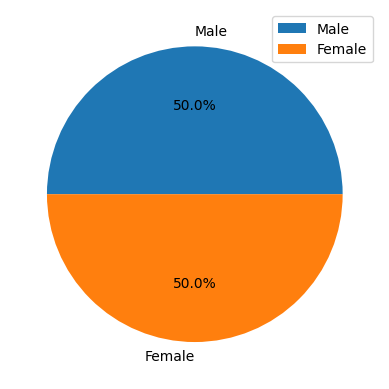

In [7]:
## Gender Column

gender = data['Gender'].value_counts()

## plot a pie chart
import plotly.express as px
plt.pie(gender, autopct='%1.1f%%', labels = ['Male', 'Female'])
plt.legend()
plt.show()

### Exploring Gender with Number of Products purchased


In [8]:
SELECT Gender, Products_Purchased, COUNT(('Products Purchased')) AS No_of_Products_purchased
FROM data
GROUP BY Gender, Products_Purchased
ORDER BY Products_purchased;

,Gender,Products_Purchased,No_of_Products_purchased
0,Female,Beauty Products,509
1,Male,Beauty Products,491
2,Female,Books,504
3,Male,Books,496
4,Female,Clothing,484
5,Male,Clothing,516
6,Male,Electronics,522
7,Female,Electronics,478
8,Male,Home Appliances,475
9,Female,Home Appliances,525


,Gender,Products_Purchased,No_of_Products_purchased
0,Female,Beauty Products,509
1,Male,Beauty Products,491
2,Female,Books,504
3,Male,Books,496
4,Female,Clothing,484
5,Male,Clothing,516
6,Male,Electronics,522
7,Female,Electronics,478
8,Male,Home Appliances,475
9,Female,Home Appliances,525


In [10]:
gen_purchase = data.groupby('Products_Purchased')['Gender'].count()
print(gen_purchase)

Products_Purchased
Beauty Products    1000
Books              1000
Clothing           1000
Electronics        1000
Home Appliances    1000
Jewelry            1000
Outdoor Gear       1000
Name: Gender, dtype: int64


In [11]:
data['Products_Purchased'].value_counts()

Clothing           1000
Jewelry            1000
Books              1000
Electronics        1000
Beauty Products    1000
Home Appliances    1000
Outdoor Gear       1000
Name: Products_Purchased, dtype: int64

### Exploring `Gender` and `Age` columns to find insights about `Average_Purchase_Value`

In [12]:
## Average_Purchase_Value

np.mean(data['Average_Purchase_Value']), np.max(data['Average_Purchase_Value']), np.min(data['Average_Purchase_Value'])

(100.77658162186144, 279.2748172, -80.26384392)

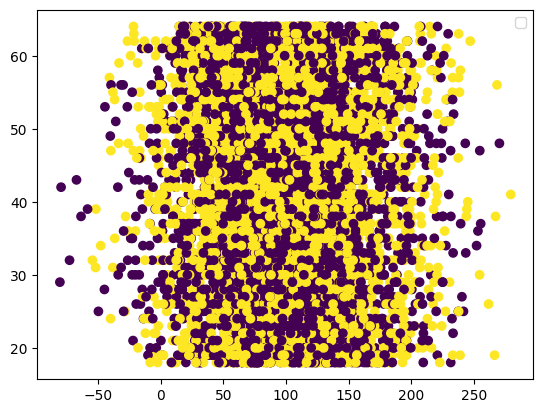

In [13]:
plt.scatter(x = data['Average_Purchase_Value'], y = data['Age'], c = data['Gender'].map({'Female':0, 'Male':1}))
plt.legend()
plt.show()

**GroupBy `Average_Purchase_Value` with `Gender` and `Age`**

In [14]:
age_gen_purchase = data.groupby('Average_Purchase_Value')['Age','Gender'].agg(np.mean)
print(age_gen_purchase)

                         Age
Average_Purchase_Value      
-80.263844              29.0
-79.316994              42.0
-72.581592              32.0
-67.031301              43.0
-63.399329              38.0
...                      ...
 266.373574             19.0
 267.100471             38.0
 268.265577             56.0
 270.199187             48.0
 279.274817             41.0

[7000 rows x 1 columns]


In [15]:
SELECT Gender, Age, SUM(Average_Purchase_Value) AS Avg_purchase_value, AVG(Average_Purchase_Value) AS Mean_purchase_value
FROM data
GROUP BY Gender, Age
ORDER BY Avg_purchase_value DESC;

,Gender,Age,Avg_purchase_value,Mean_purchase_value
0,Male,19,9548.851042,108.509671
1,Male,61,9379.970288,99.786918
2,Male,29,9375.287975,112.955277
3,Female,59,9265.359130,110.301894
4,Male,54,9258.649550,101.743402
...,...,...,...,...
89,Female,64,5930.026260,95.645585
90,Male,64,5827.338282,95.530136
91,Female,61,5371.780871,92.616912
92,Male,21,5267.664782,95.775723


,Gender,Age,Avg_purchase_value,Mean_purchase_value
0,Male,19,9548.851042,108.509671
1,Male,61,9379.970288,99.786918
2,Male,29,9375.287975,112.955277
3,Female,59,9265.359130,110.301894
4,Male,54,9258.649550,101.743402
...,...,...,...,...
89,Female,64,5930.026260,95.645585
90,Male,64,5827.338282,95.530136
91,Female,61,5371.780871,92.616912
92,Male,21,5267.664782,95.775723


In [17]:
--- Unique Customer
SELECT COUNT(DISTINCT(Customer_Id)) AS unique_customer
FROM data;

,unique_customer
0,7000


#### Creating `Age_Group` for better interpretation 

In [18]:
## unique Locations in the daatset and Unique Age group in the dataset

age_val = data['Age'].value_counts()
loc_val = data['Locations'].value_counts()

In [19]:
# creating array's of the Age data
ages = np.array(data['Age'])

# converting to Series  
ages_series = pd.Series(ages)

# Group's limit
bins = [15, 25, 35, 45, 55, 65]

# Create a new column with the age groups
age_groups = pd.cut(ages_series, bins = bins, labels = ['15-25', '25-35', '35-45', '45-55', '55-65'])

# Creating dataframe of the `Age_Group`
Age_groups = pd.DataFrame(age_groups)

# Creating new column in the dataset
data['Age_Group'] = Age_groups

### Correlation between columns

In [20]:
from scipy.stats import pearsonr

## correlation 
corr = data.corr(method = 'pearson')
corr = pd.DataFrame(corr)
corr

,Age,Income,No._Family_Members,Home_Value,Years_in_Current_Home,Credit_Score,Number_of_Credit_Cards,Total_Credit_Card_Limit,Total_Credit_Card_Balance,Number_of_Online_Purchases,Average_Purchase_Value,Last_Purchase_Value,Days_Since_Last_Purchase,Number_of_Returns,Total_Values_of_Returns
Age,1.000000,-0.009948,-0.006797,0.002058,0.021344,-0.003985,0.017601,-0.010505,-0.006440,0.001912,-0.009879,-0.018016,0.006664,-0.007341,0.010783
Income,-0.009948,1.000000,0.000123,-0.018464,0.006419,0.014244,-0.004948,-0.003197,-0.009829,0.008609,-0.027527,0.010676,0.009504,-0.001792,0.016797
No._Family_Members,-0.006797,0.000123,1.000000,0.005093,-0.006811,0.002889,0.004128,0.008969,0.004704,0.001891,0.019183,-0.002390,0.004422,0.008178,-0.012740
Home_Value,0.002058,-0.018464,0.005093,1.000000,-0.009355,-0.011006,-0.013214,-0.010251,0.001280,0.021530,0.023523,-0.005124,-0.003176,0.002698,-0.019529
Years_in_Current_Home,0.021344,0.006419,-0.006811,-0.009355,1.000000,-0.015643,0.002822,0.001956,-0.012863,-0.003632,-0.017333,-0.013749,-0.004300,-0.006674,-0.002959
Credit_Score,-0.003985,0.014244,0.002889,-0.011006,-0.015643,1.000000,-0.006427,0.005339,-0.004047,0.002846,0.005438,-0.017627,-0.004151,-0.014700,-0.006884
Number_of_Credit_Cards,0.017601,-0.004948,0.004128,-0.013214,0.002822,-0.006427,1.000000,-0.007031,0.004065,-0.008273,-0.001306,-0.008077,0.010119,0.011167,-0.001536
Total_Credit_Card_Limit,-0.010505,-0.003197,0.008969,-0.010251,0.001956,0.005339,-0.007031,1.000000,-0.013790,0.005315,0.007215,-0.006619,0.000014,0.004891,-0.005234
Total_Credit_Card_Balance,-0.006440,-0.009829,0.004704,0.001280,-0.012863,-0.004047,0.004065,-0.013790,1.000000,0.012183,0.007337,0.011409,0.013159,0.008024,0.019099
Number_of_Online_Purchases,0.001912,0.008609,0.001891,0.021530,-0.003632,0.002846,-0.008273,0.005315,0.012183,1.000000,-0.005507,0.006709,0.008046,0.019126,-0.005817


In [21]:
data.columns

Index(['Customer_ID', 'Gender', 'Age', 'Income', 'Occupation',
       'Marital_Status', 'No._Family_Members', 'Home_Ownership', 'Home_Value',
       'Years_in_Current_Home', 'Credit_Score', 'Number_of_Credit_Cards',
       'Total_Credit_Card_Limit', 'Total_Credit_Card_Balance', 'Product_ID',
       'Products_Purchased', 'Number_of_Online_Purchases',
       'Average_Purchase_Value', 'Last_Purchase_Value',
       'Days_Since_Last_Purchase', 'Number_of_Returns',
       'Total_Values_of_Returns', 'Locations', 'Age_Group'],
      dtype='object')

### Figure out `Average_purchase_value` with respect to `Occupation`, `Gender`, `Age`

In [22]:
--- Group By `Occupation`, 'Gender', `Age` and 'Products_Purchased'

SELECT Gender, Age_Group, Occupation, COUNT(Products_purchased) AS pro_purchase, SUM(Average_Purchase_Value) AS avg_purchase
FROM data
GROUP BY Gender, Age_Group, Occupation
ORDER BY avg_purchase DESC;

,Gender,Age_Group,Occupation,pro_purchase,avg_purchase
0,Male,35-45,Student,124,12810.393106
1,Female,25-35,Executive,121,12436.305906
2,Male,45-55,Self-employed,122,12430.980402
3,Female,35-45,Manager,112,12360.622029
4,Female,45-55,Self-employed,118,12063.875676
...,...,...,...,...,...
65,Male,15-25,Self-employed,77,7711.935488
66,Female,15-25,Self-employed,72,7666.754307
67,Female,55-65,Student,85,7650.602646
68,Male,15-25,Executive,74,7597.518226


,Gender,Age_Group,Occupation,pro_purchase,avg_purchase
0,Male,35-45,Student,124,12810.393106
1,Female,25-35,Executive,121,12436.305906
2,Male,45-55,Self-employed,122,12430.980402
3,Female,35-45,Manager,112,12360.622029
4,Female,45-55,Self-employed,118,12063.875676
...,...,...,...,...,...
65,Male,15-25,Self-employed,77,7711.935488
66,Female,15-25,Self-employed,72,7666.754307
67,Female,55-65,Student,85,7650.602646
68,Male,15-25,Executive,74,7597.518226


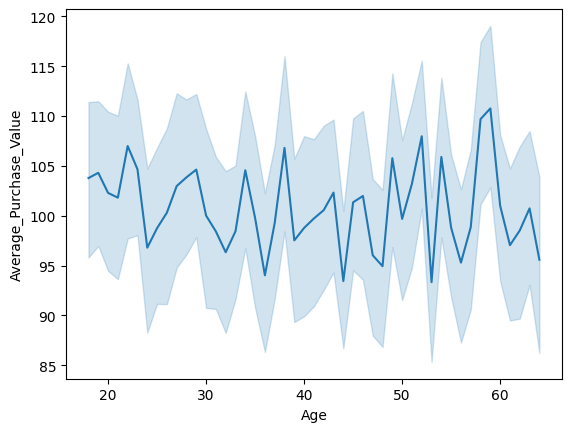

In [24]:
## ploting `Occupation`, `Gender`, and `Average_Purchase_Value` 
import seaborn as sns
sns.lineplot(y = 'Average_Purchase_Value', x = 'Age', data = data)
# plt.plot(figsize = (16,9))
plt.show()

### Finding out variation of Avg_purchase_value with `Total_Values_of_Returns`, `Gender`. `Age`, `Locations` 

In [25]:
data.columns

Index(['Customer_ID', 'Gender', 'Age', 'Income', 'Occupation',
       'Marital_Status', 'No._Family_Members', 'Home_Ownership', 'Home_Value',
       'Years_in_Current_Home', 'Credit_Score', 'Number_of_Credit_Cards',
       'Total_Credit_Card_Limit', 'Total_Credit_Card_Balance', 'Product_ID',
       'Products_Purchased', 'Number_of_Online_Purchases',
       'Average_Purchase_Value', 'Last_Purchase_Value',
       'Days_Since_Last_Purchase', 'Number_of_Returns',
       'Total_Values_of_Returns', 'Locations', 'Age_Group'],
      dtype='object')

In [26]:
data.head()

,Customer_ID,Gender,Age,Income,Occupation,Marital_Status,No._Family_Members,Home_Ownership,Home_Value,Years_in_Current_Home,Credit_Score,Number_of_Credit_Cards,Total_Credit_Card_Limit,Total_Credit_Card_Balance,Product_ID,Products_Purchased,Number_of_Online_Purchases,Average_Purchase_Value,Last_Purchase_Value,Days_Since_Last_Purchase,Number_of_Returns,Total_Values_of_Returns,Locations,Age_Group
0,C001,Female,23,27275,Student,Single,2,Own,442797,13,940,5,12331,22979,P001,Clothing,8,142.776953,50.131325,29,1,20.110947,Bangalore,15-25
1,C002,Female,18,35579,Student,Single,3,Own,182090,17,932,1,15733,18890,P002,Jewelry,16,152.688423,40.423631,66,4,33.868237,Delhi,15-25
2,C003,Male,45,59347,Homemaker,Single,2,Own,973684,12,552,5,22769,14721,P003,Jewelry,3,115.261674,88.014050,131,4,94.178999,Jaipur,35-45
3,C004,Female,19,27105,Student,Married,3,Own,94669,7,557,5,9127,21491,P004,Books,1,48.428081,192.532891,50,5,51.754754,Nashik,15-25
4,C005,Female,45,47566,Homemaker,Single,4,Own,938493,7,858,5,8278,2842,P005,Jewelry,13,183.458441,233.079310,171,3,76.830901,Bangalore,35-45


[]

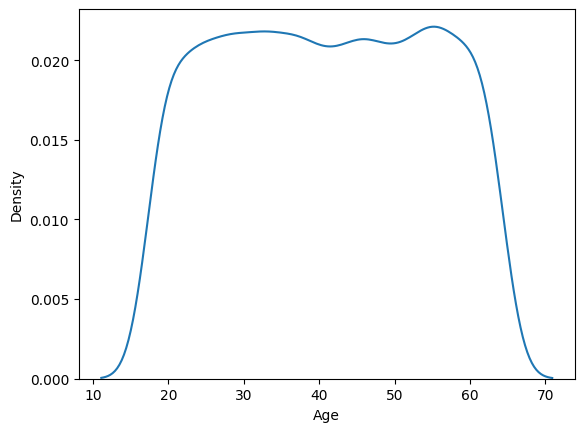

In [27]:
## Creating Density plot of the `Age` data
sns.kdeplot(data['Age'])
plt.plot()

[]

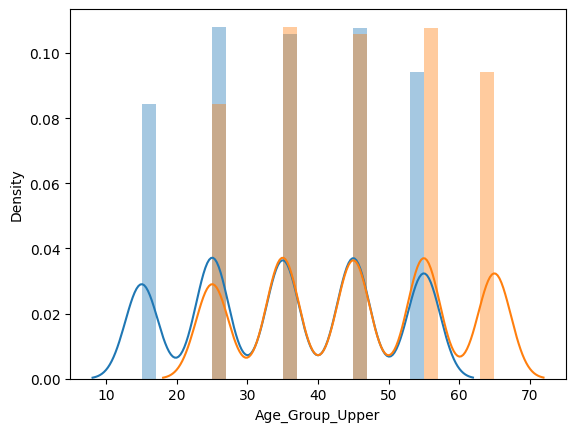

In [28]:
## plot density plot

age_groups = data['Age_Group'].str.split('-', expand=True)
data['Age_Group_Lower'] = pd.to_numeric(age_groups[0])
data['Age_Group_Upper'] = pd.to_numeric(age_groups[1])

sns.distplot(data['Age_Group_Lower'])
sns.distplot(data['Age_Group_Upper'])
plt.plot()

In [29]:
--- variation of Avg_purchase_value with Total_Values_of_Returns, Gender. Age, Locations
SELECT Gender, Locations, SUM(Average_Purchase_Value) AS avg_purchase_value, SUM(Total_Values_of_Returns) AS returns_value
FROM data
GROUP BY Gender, Locations
ORDER BY avg_purchase_value, returns_value DESC;

,Gender,Locations,avg_purchase_value,returns_value
0,Female,Hyderabad,14882.014517,8174.826199
1,Female,Mumbai,15113.152622,8418.528465
2,Female,Agra,15480.550864,7442.261095
3,Male,Kanpur,15543.290411,8236.802214
4,Male,Nashik,15609.635947,8313.620683
5,Male,Bangalore,16081.738467,8973.672780
6,Female,Jaipur,16225.880676,7301.219047
7,Female,Bhopal,16341.066518,8407.179980
8,Female,Nagpur,16582.731180,9147.051700
9,Male,Vadodara,16703.470618,7661.350690


,Gender,Locations,avg_purchase_value,returns_value
0,Female,Hyderabad,14882.014517,8174.826199
1,Female,Mumbai,15113.152622,8418.528465
2,Female,Agra,15480.550864,7442.261095
3,Male,Kanpur,15543.290411,8236.802214
4,Male,Nashik,15609.635947,8313.620683
5,Male,Bangalore,16081.738467,8973.672780
6,Female,Jaipur,16225.880676,7301.219047
7,Female,Bhopal,16341.066518,8407.179980
8,Female,Nagpur,16582.731180,9147.051700
9,Male,Vadodara,16703.470618,7661.350690


,Gender,Locations,avg_purchase_value,returns_value
0,Female,Hyderabad,14882.014517,8174.826199
1,Female,Mumbai,15113.152622,8418.528465
2,Female,Agra,15480.550864,7442.261095
3,Male,Kanpur,15543.290411,8236.802214
4,Male,Nashik,15609.635947,8313.620683
5,Male,Bangalore,16081.738467,8973.672780
6,Female,Jaipur,16225.880676,7301.219047
7,Female,Bhopal,16341.066518,8407.179980
8,Female,Nagpur,16582.731180,9147.051700
9,Male,Vadodara,16703.470618,7661.350690


In [32]:
--- Net Shopping Locations and Gender wise
SELECT Gender, Locations, (avg_purchase_value - returns_value) AS net_shopping
FROM (SELECT Gender, Locations, SUM(Average_Purchase_Value) AS avg_purchase_value, SUM(Total_Values_of_Returns) AS returns_value
FROM data
GROUP BY Gender, Locations) AS sub
ORDER BY net_shopping DESC;

,Gender,Locations,net_shopping
0,Female,Delhi,10885.484771
1,Male,Mumbai,10694.738058
2,Female,Patna,10249.889272
3,Male,Ludhiana,10156.383395
4,Female,Kanpur,10108.063194
5,Male,Pune,10080.488261
6,Male,Lucknow,10049.172354
7,Male,Bhopal,10042.257392
8,Female,Ahmedabad,9724.645012
9,Male,Patna,9722.805035


,Gender,Locations,net_shopping
0,Female,Delhi,10885.484771
1,Male,Mumbai,10694.738058
2,Female,Patna,10249.889272
3,Male,Ludhiana,10156.383395
4,Female,Kanpur,10108.063194
5,Male,Pune,10080.488261
6,Male,Lucknow,10049.172354
7,Male,Bhopal,10042.257392
8,Female,Ahmedabad,9724.645012
9,Male,Patna,9722.805035


### Most consistent customer City

In [34]:
data.columns

Index(['Customer_ID', 'Gender', 'Age', 'Income', 'Occupation',
       'Marital_Status', 'No._Family_Members', 'Home_Ownership', 'Home_Value',
       'Years_in_Current_Home', 'Credit_Score', 'Number_of_Credit_Cards',
       'Total_Credit_Card_Limit', 'Total_Credit_Card_Balance', 'Product_ID',
       'Products_Purchased', 'Number_of_Online_Purchases',
       'Average_Purchase_Value', 'Last_Purchase_Value',
       'Days_Since_Last_Purchase', 'Number_of_Returns',
       'Total_Values_of_Returns', 'Locations', 'Age_Group', 'Age_Group_Lower',
       'Age_Group_Upper'],
      dtype='object')

In [35]:
## Group By `Days_Since_Last_Purchase`, `Gender`, `Age`, and `Locations` 

data.groupby('Days_Since_Last_Purchase')['Gender', 'Age', 'Locations'].mean().sort_values(by = 'Days_Since_Last_Purchase')

,Age
Days_Since_Last_Purchase,
0,38.194444
1,43.750000
2,35.925000
3,39.833333
4,38.818182
...,...
176,40.885714
177,42.048780
178,37.615385


In [36]:
SELECT Gender, Age_Group, Locations, AVG(Days_Since_Last_Purchase) AS Last_Purchase 
FROM data 
GROUP BY Gender, Age_Group, Locations
ORDER BY Last_Purchase ASC;

,Gender,Age_Group,Locations,Last_Purchase
0,Male,15-25,Kanpur,62.480000
1,Female,15-25,Nashik,63.333333
2,Female,25-35,Bhopal,64.976190
3,Female,25-35,Nagpur,65.965517
4,Male,45-55,Kanpur,70.964286
...,...,...,...,...
195,Female,45-55,Nashik,106.962963
196,Male,25-35,Pune,107.647059
197,Male,25-35,Kanpur,108.416667
198,Female,25-35,Hyderabad,108.652174


,Gender,Age_Group,Locations,Last_Purchase
0,Male,15-25,Kanpur,62.480000
1,Female,15-25,Nashik,63.333333
2,Female,25-35,Bhopal,64.976190
3,Female,25-35,Nagpur,65.965517
4,Male,45-55,Kanpur,70.964286
...,...,...,...,...
195,Female,45-55,Nashik,106.962963
196,Male,25-35,Pune,107.647059
197,Male,25-35,Kanpur,108.416667
198,Female,25-35,Hyderabad,108.652174


In [38]:
data.columns

Index(['Customer_ID', 'Gender', 'Age', 'Income', 'Occupation',
       'Marital_Status', 'No._Family_Members', 'Home_Ownership', 'Home_Value',
       'Years_in_Current_Home', 'Credit_Score', 'Number_of_Credit_Cards',
       'Total_Credit_Card_Limit', 'Total_Credit_Card_Balance', 'Product_ID',
       'Products_Purchased', 'Number_of_Online_Purchases',
       'Average_Purchase_Value', 'Last_Purchase_Value',
       'Days_Since_Last_Purchase', 'Number_of_Returns',
       'Total_Values_of_Returns', 'Locations', 'Age_Group', 'Age_Group_Lower',
       'Age_Group_Upper'],
      dtype='object')

In [39]:
data['Home_Ownership'].value_counts()

Own     3500
Rent    3500
Name: Home_Ownership, dtype: int64

In [40]:
data['Number_of_Credit_Cards'].value_counts()

3    1435
5    1423
2    1399
1    1376
4    1367
Name: Number_of_Credit_Cards, dtype: int64

In [41]:
data['Credit_Score'].value_counts()


859    28
784    27
552    26
657    24
558    24
       ..
629     7
709     7
591     7
914     6
690     5
Name: Credit_Score, Length: 500, dtype: int64

In [42]:
data['Occupation'].value_counts()

Student          1000
Homemaker        1000
Technician       1000
Self-employed    1000
Manager          1000
Professional     1000
Executive        1000
Name: Occupation, dtype: int64

In [43]:
data['Occupation'].nunique()

7

In [44]:
data['Number_of_Online_Purchases'].value_counts()

6     369
18    367
20    352
1     345
4     344
10    343
13    341
14    339
15    337
2     336
12    334
9     334
19    330
7     327
16    323
11    320
3     318
17    317
8     316
5     308
0     300
Name: Number_of_Online_Purchases, dtype: int64

In [45]:
data.groupby('Occupation')['Average_Purchase_Value'].agg(sum).sort_values(ascending = False)

Occupation
Manager          102495.057892
Executive        102011.737692
Self-employed    101680.028269
Student          100614.298865
Professional      99988.431597
Technician        99667.997371
Homemaker         98978.519667
Name: Average_Purchase_Value, dtype: float64

In [57]:
online_age_purchase = data.groupby('Age_Group')['Number_of_Online_Purchases'].count()
online_age_purchase

Age_Group
15-25    1182
25-35    1513
35-45    1481
45-55    1507
55-65    1317
Name: Number_of_Online_Purchases, dtype: int64

In [47]:
data['Number_of_Online_Purchases'].nunique()

21